In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
plt.style.use(['ggplot'])

# Create Data
Generate some data with: $$ \theta_0= 4 $$$$ \theta_1= 3 $$
Add some Gaussian noise to the data

In [34]:
X=2*np.random.rand(90,1)
y=4+3*X+np.random.randn(90,1)

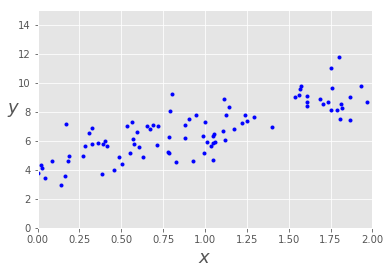

In [35]:
plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$",rotation=0,fontsize=18)
_=plt.axis([0,2,0,15])

In [36]:
X_b = np.c_[np.ones((90,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[4.29614837]
 [2.58360679]]


In [37]:
X_new=np.array([[0],[2]])
X_new_b=np.c_[np.ones((2,1)),X_new]
y_predict=X_new_b.dot(theta_best)
y_predict

array([[4.29614837],
       [9.46336194]])

# plotting preditiction line with calculate:theta


[0, 2, 0, 15]

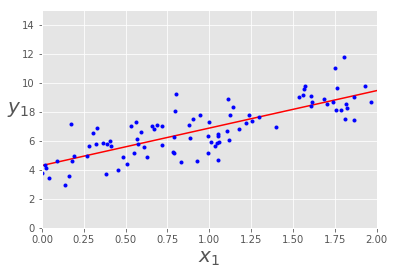

In [42]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X,y,'b.')
plt.xlabel("$x_1$", fontsize=20)
plt.ylabel("$y_1$",rotation=0,fontsize=20)
plt.axis([0,2,0,15])

# Gredient Descent


When specifically applied to the case of linear regression, a new form of the gradient descent equation can be derived.

repeat until convergence: {
 J(θ)=:
     θ0−α1m∑i=1m(hθ(xi)−yi)
 derivative of J(θ)=:
     θ1−α1m∑i=1m((hθ(xi)−yi)xi)
}



In [43]:
def calc_cost(theta,X,y):
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost 

In [48]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = calc_cost(theta,X,y)
        
    return theta, cost_history, theta_history

Let's start with 1000 iterations and a learning rate of 0.01. Start with theta from a Gaussian distribution


In [51]:

lr =0.01
n_iter = 1000

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          4.305,
Theta1:          2.576
Final cost/MSE:  4805.878


Let's plot the cost history over iterations

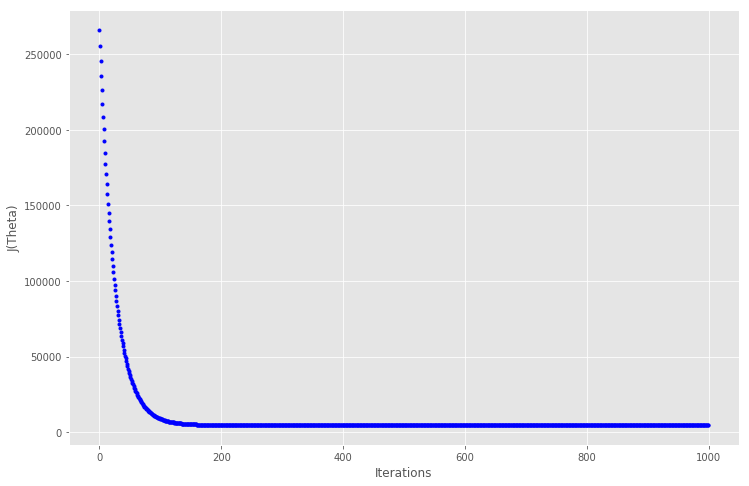

In [52]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

# After around 150 iterations the cost is flat so the remaining iterations are not needed or will not result in any further optimization.